In [ ]:
!pip install google-cloud-bigquery pandas matplotlib seaborn

In [ ]:
from google.cloud import bigquery
from google.oauth2 import service_account
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the uploaded service account key
KEY_PATH = "/content/zinc-wares-460713-v0-1cc968ced265.json"

# Authenticate with BigQuery
credentials = service_account.Credentials.from_service_account_file(KEY_PATH)
client = bigquery.Client(credentials=credentials, project=credentials.project_id)


           make      avg_price
0   rolls-royce  153488.235294
1       ferrari  127210.526316
2   lamborghini  112625.000000
3       bentley   74755.701754
4     airstream   71000.000000
..          ...            ...
61     dodge tk     550.000000
62          geo     528.947368
63          dot     500.000000
64   ford truck     483.333333
65       daewoo     400.000000

[66 rows x 2 columns]


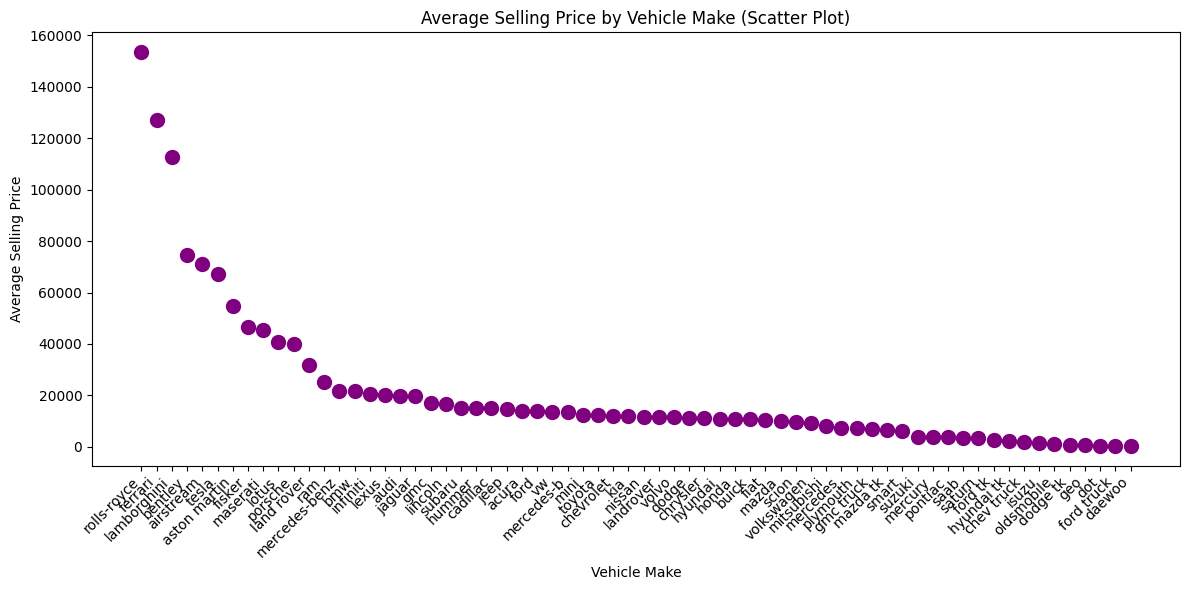

In [ ]:
#average selling price by vehicle make


query = """

SELECT
  dv.make,
  AVG(fv.sellingprice) AS avg_price
FROM
  `zinc-wares-460713-v0.p2_vehicles_dataset.fact_vehicle_sales_table` fv
JOIN
  `zinc-wares-460713-v0.p2_vehicles_dataset.dim_vehicles_table` dv
ON
  fv.vehicle_id = dv.vehicle_id
GROUP BY
  dv.make
ORDER BY
  avg_price DESC;

"""

df = client.query(query).to_dataframe()
print(df)


# Plotting

plt.figure(figsize=(12, 6))
plt.scatter(df['make'], df['avg_price'], color='purple', s=100)  # s is marker size
plt.xticks(rotation=45, ha='right')
plt.xlabel('Vehicle Make')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price by Vehicle Make (Scatter Plot)')
plt.tight_layout()
plt.show()


     make   model interior   color  preference_count
0  nissan  altima    black   black              3123
1    ford   f-150     gray   white              2971
2  nissan  altima    black   white              2289
3  nissan  altima    black    gray              2204
4  nissan  altima    black  silver              2005


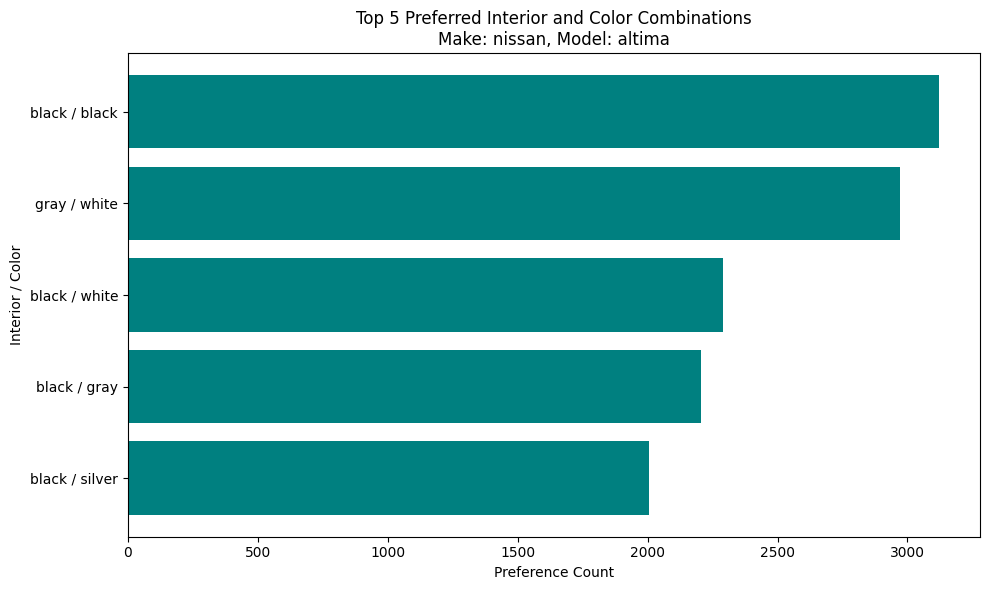

In [ ]:
#most preferred interior and color for a specific make and model of a vehicle

query = """

SELECT
  dv.make,
  dv.model,
  dv.interior,
  dv.color,
  COUNT(*) AS preference_count
FROM
  `zinc-wares-460713-v0.p2_vehicles_dataset.fact_vehicle_sales_table` fs
JOIN
  `zinc-wares-460713-v0.p2_vehicles_dataset.dim_vehicles_table` dv
ON
  fs.vehicle_id = dv.vehicle_id
GROUP BY
  dv.make, dv.model, dv.interior, dv.color
ORDER BY
  preference_count DESC
LIMIT 5;
"""

df = client.query(query).to_dataframe()
print(df)


df['label'] = df['interior'] + " / " + df['color']

plt.figure(figsize=(10, 6))
plt.barh(df['label'], df['preference_count'], color='teal')
plt.xlabel('Preference Count')
plt.ylabel('Interior / Color')
plt.title(f"Top 5 Preferred Interior and Color Combinations\nMake: {df['make'][0]}, Model: {df['model'][0]}")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


                          seller    revenue
0  ford motor credit company llc  340526625
1             nissan-infiniti lt  271874860
2          the hertz corporation  250616068
3             nissan infiniti lt  216002671
4               avis corporation  203251230


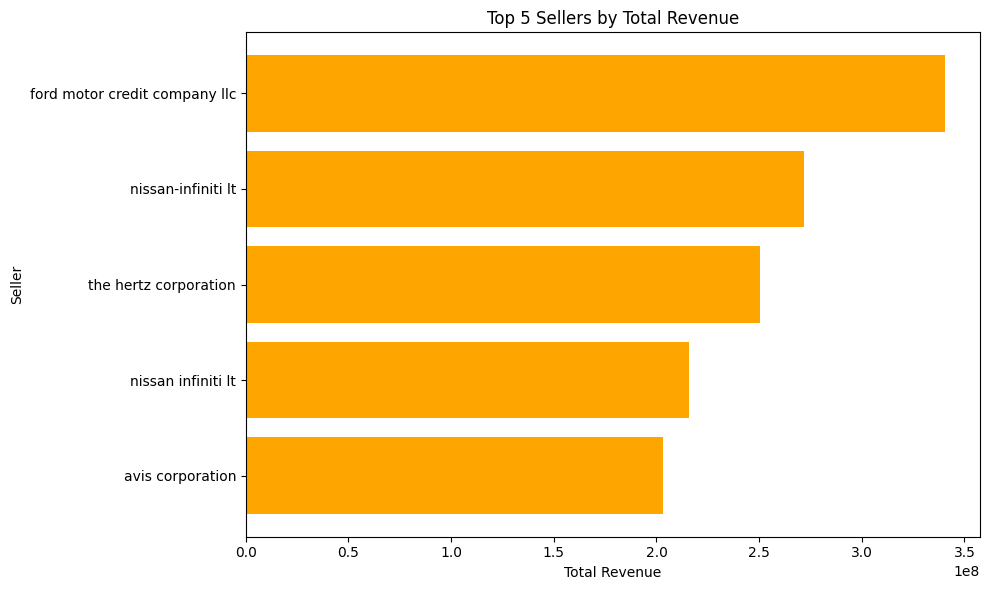

In [ ]:
#top 5 sellers by total revenue

query = """

SELECT
  ds.seller,
  SUM(fv.sellingprice) AS revenue
FROM
  `zinc-wares-460713-v0.p2_vehicles_dataset.fact_vehicle_sales_table` fv
JOIN
  `zinc-wares-460713-v0.p2_vehicles_dataset.dim_seller_table` ds
ON
  fv.seller_id = ds.seller_id
GROUP BY
  ds.seller
ORDER BY
  revenue DESC
LIMIT 5;

"""

df = client.query(query).to_dataframe()
print(df)


plt.figure(figsize=(10, 6))
plt.barh(df['seller'], df['revenue'], color='orange')
plt.xlabel('Total Revenue')
plt.ylabel('Seller')
plt.title('Top 5 Sellers by Total Revenue')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

  state  vehicles_sold
0    fl          81913
1    ca          71611
2    pa          53206
3    tx          45049
4    ga          34003


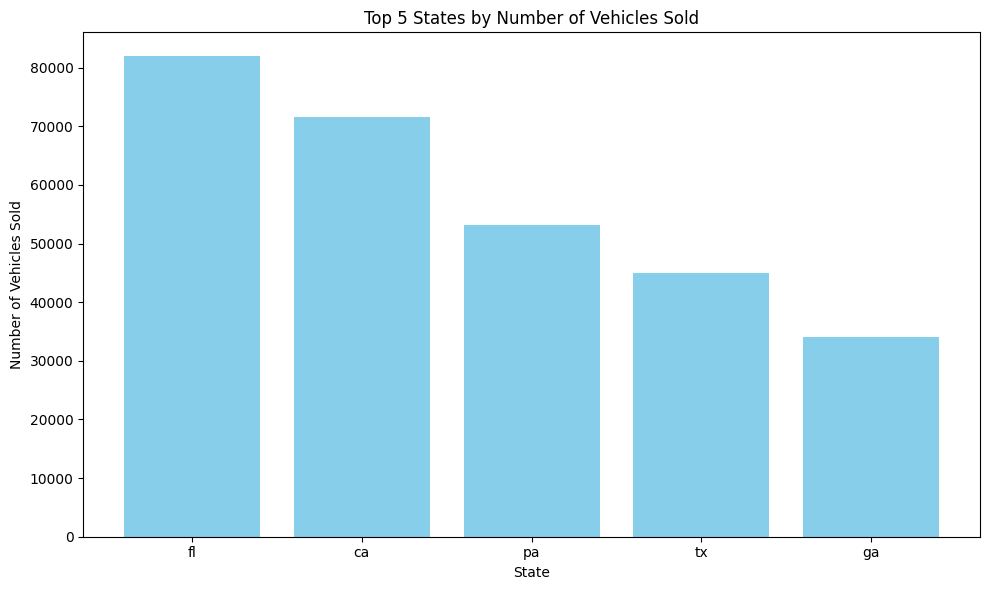

In [ ]:


#top 5 states by number of vehicles sold


query = """

SELECT
  dv.state,
  COUNT(*) AS vehicles_sold
FROM
  `zinc-wares-460713-v0.p2_vehicles_dataset.fact_vehicle_sales_table` fs
JOIN
  `zinc-wares-460713-v0.p2_vehicles_dataset.dim_vehicles_table` dv
ON
  fs.vehicle_id = dv.vehicle_id
GROUP BY
  dv.state
ORDER BY
  vehicles_sold DESC
LIMIT 5;
"""

df = client.query(query).to_dataframe()
print(df)



plt.figure(figsize=(10, 6))
plt.bar(df['state'], df['vehicles_sold'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Vehicles Sold')
plt.title('Top 5 States by Number of Vehicles Sold')
plt.tight_layout()
plt.show()


            make  year  total_sales  avg_selling_price
0           ford  2014         7830           11180.28
1      chevrolet  2014         6242            9542.31
2         nissan  2014         4700           10401.26
3         toyota  2014         4083           10857.69
4          honda  2014         3494            9719.98
..           ...   ...          ...                ...
116  lamborghini  2015            4          112625.00
117   ford truck  2015            2             550.00
118       daewoo  2015            2             450.00
119        lotus  2015            1           40800.00
120   mercedes-b  2015            1            8800.00

[121 rows x 4 columns]


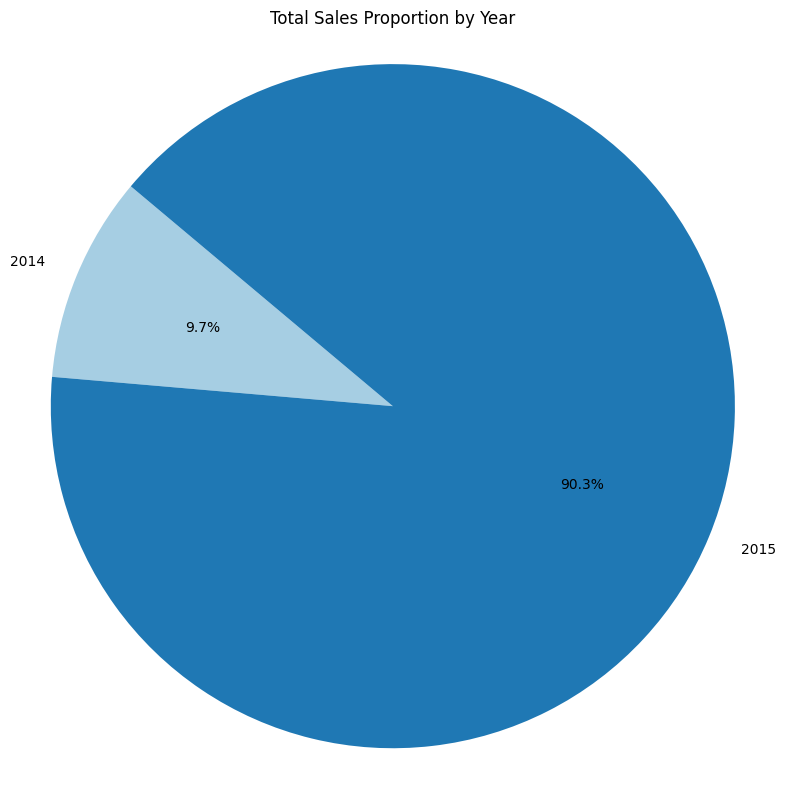

In [ ]:

#total_sales and average_Selling_price based on make and year

query = """

SELECT
  dv.make,
  EXTRACT(YEAR FROM dd.saledate) AS year,
  COUNT(*) AS total_sales,
  ROUND(AVG(fv.sellingprice), 2) AS avg_selling_price
FROM
  `zinc-wares-460713-v0.p2_vehicles_dataset.fact_vehicle_sales_table` fv
INNER JOIN
  `zinc-wares-460713-v0.p2_vehicles_dataset.dim_vehicles_table` dv
ON
  fv.vehicle_id = dv.vehicle_id
INNER JOIN
  `zinc-wares-460713-v0.p2_vehicles_dataset.dim_date_table` dd
ON
  fv.date_id = dd.date_id
GROUP BY
  dv.make, year
ORDER BY
  year, total_sales DESC;

"""

df = client.query(query).to_dataframe()
print(df)

# Group data by 'year' and sum the 'total_sales'
total_sales_by_year = df.groupby('year')['total_sales'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_sales_by_year, labels=total_sales_by_year.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Total Sales Proportion by Year')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.tight_layout()
plt.show()


            make           model  avg_odometer
0         toyota           paseo     338382.00
1           ford  windstar cargo     278807.75
2           ford            f350     273757.00
3            gmc            2500     271357.00
4         toyota          previa     264551.00
5           ford          bronco     257692.00
6       dodge tk              gr     246997.00
7           ford          excurs     240102.75
8  mercedes-benz       400-class     225623.00
9          mazda           b2300     218664.00


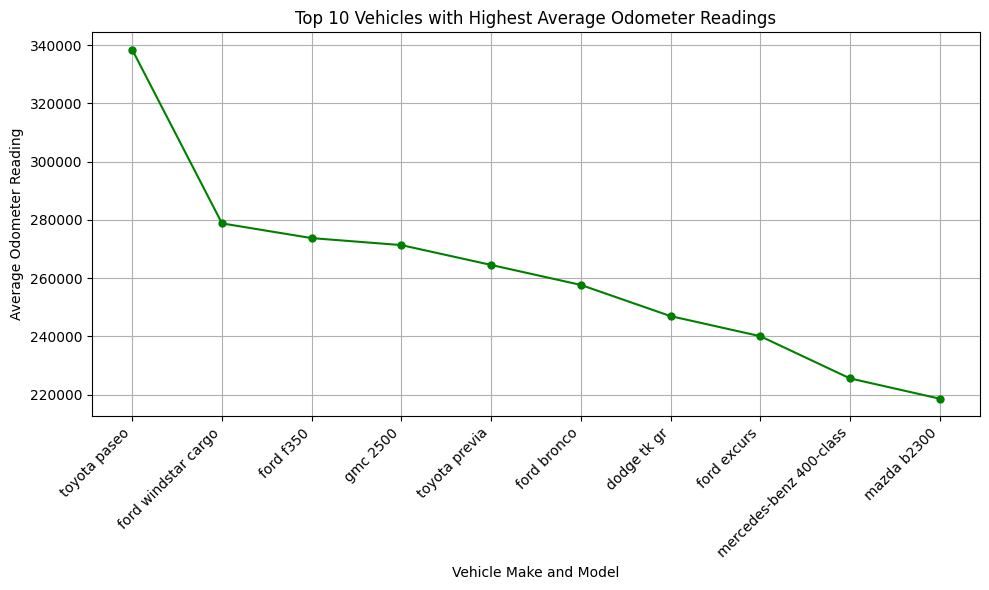

In [ ]:

#type of vehicles that gives higheset mileage

query = """
SELECT
  dv.make,
  dv.model,
  AVG(fv.odometer) AS avg_odometer
FROM
  `zinc-wares-460713-v0.p2_vehicles_dataset.fact_vehicle_sales_table` fv
JOIN
  `zinc-wares-460713-v0.p2_vehicles_dataset.dim_vehicles_table` dv
ON
  fv.vehicle_id = dv.vehicle_id
GROUP BY
  dv.make, dv.model
ORDER BY
  avg_odometer DESC
LIMIT 10;
"""

df = client.query(query).to_dataframe()
print(df)

df['make_model'] = df['make'] + ' ' + df['model']

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(df['make_model'], df['avg_odometer'], marker='o', color='green', linestyle='-', markersize=5)

# Adding labels and title
plt.xlabel('Vehicle Make and Model')
plt.ylabel('Average Odometer Reading')
plt.title('Top 10 Vehicles with Highest Average Odometer Readings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

    condition  count
0           1   7324
1           2  20548
2           3  10645
3           4  19718
4           5  11080
5          11     87
6          12     95
7          13     81
8          14    132
9          15    143
10         16    175
11         17    240
12         18    318
13         19  53420
14         21   9042
15         22   5941
16         23   8039
17         24   9158
18         25  12344
19         26  11693
20         27  16072
21         28  18876
22         29  18633
23         31   9049
24         32   9780
25         33  10435
26         34  17076
27         35  26249
28         36  22783
29         37  25465
30         38  18454
31         39  19618
32         41  22661
33         42  23976
34         43  24544
35         44  25123
36         45  12123
37         46  12454
38         47  11210
39         48  12561
40         49  12931


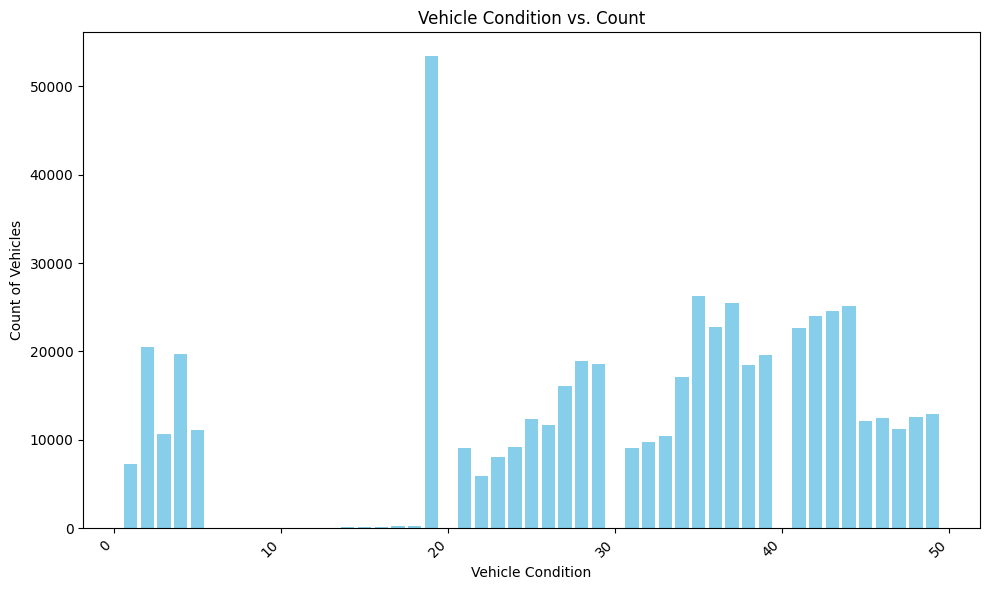

In [ ]:

#vehicle condition

query = """
SELECT
  condition,
  COUNT(*) AS count
FROM
  `zinc-wares-460713-v0.p2_vehicles_dataset.fact_vehicle_sales_table`
GROUP BY
  condition
ORDER BY
  condition;
"""

df = client.query(query).to_dataframe()
print(df)

# Assuming 'df' contains 'condition' and 'count' columns
plt.figure(figsize=(10, 6))
plt.bar(df['condition'], df['count'], color='skyblue')

# Adding labels and title
plt.xlabel('Vehicle Condition')
plt.ylabel('Count of Vehicles')
plt.title('Vehicle Condition vs. Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

            make  year  total_sales  avg_selling_price
0           ford  2014         7830           11180.28
1      chevrolet  2014         6242            9542.31
2         nissan  2014         4700           10401.26
3         toyota  2014         4083           10857.69
4          honda  2014         3494            9719.98
..           ...   ...          ...                ...
116  lamborghini  2015            4          112625.00
117   ford truck  2015            2             550.00
118       daewoo  2015            2             450.00
119        lotus  2015            1           40800.00
120   mercedes-b  2015            1            8800.00

[121 rows x 4 columns]


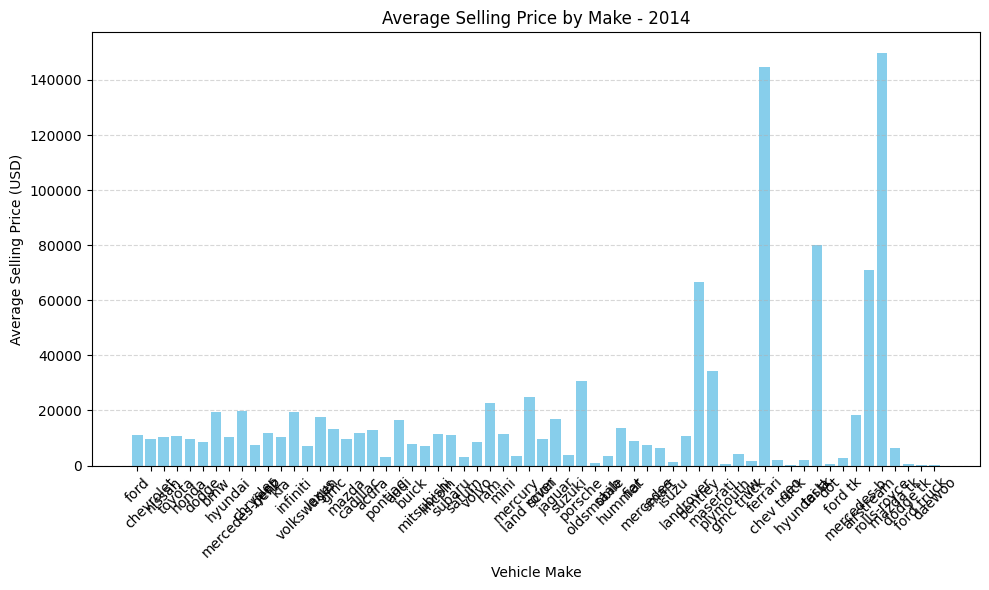

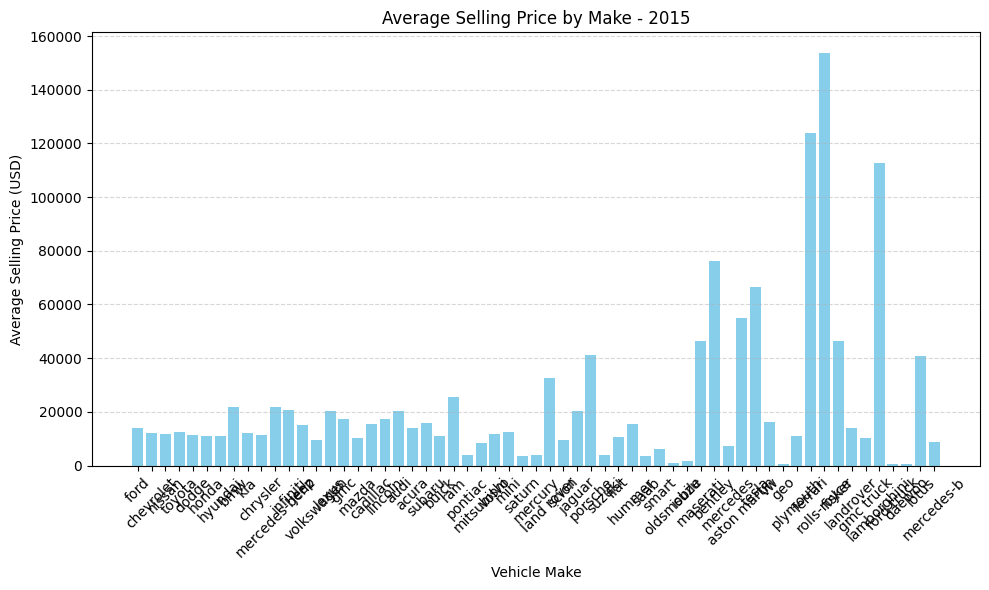

In [ ]:
# Yearly Total Vehicle Sales by Make

query = """
SELECT
  DISTINCT(dv.make),
  EXTRACT(YEAR FROM dd.saledate) AS year,
  COUNT(*) AS total_sales,
  ROUND(AVG(fv.sellingprice), 2) AS avg_selling_price
FROM
  zinc-wares-460713-v0.p2_vehicles_dataset.fact_vehicle_sales_table fv
INNER JOIN
  zinc-wares-460713-v0.p2_vehicles_dataset.dim_vehicles_table dv
ON
  fv.vehicle_id = dv.vehicle_id
INNER JOIN
  zinc-wares-460713-v0.p2_vehicles_dataset.dim_date_table dd
ON
  fv.date_id = dd.date_id
GROUP BY
  dv.make, year
ORDER BY
  year, total_sales DESC;
"""

df = client.query(query).to_dataframe()
print(df)

# Plot average selling price by make for each year
years = df['year'].unique()

for yr in sorted(years):
    subset = df[df['year'] == yr]

    plt.figure(figsize=(10, 6))
    plt.bar(subset['make'], subset['avg_selling_price'], color='skyblue')
    plt.title(f'Average Selling Price by Make - {yr}')
    plt.xlabel('Vehicle Make')
    plt.ylabel('Average Selling Price (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

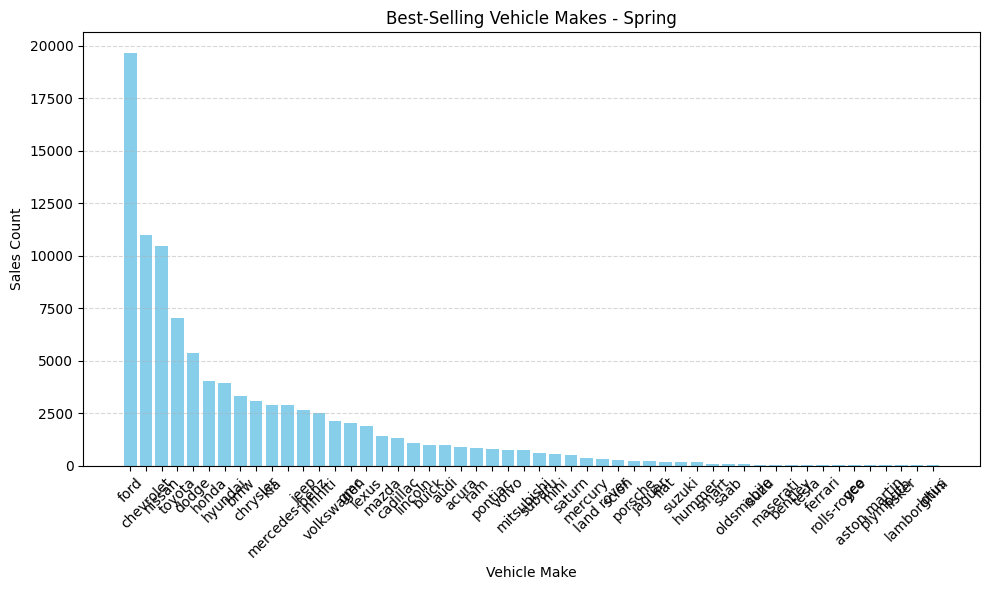

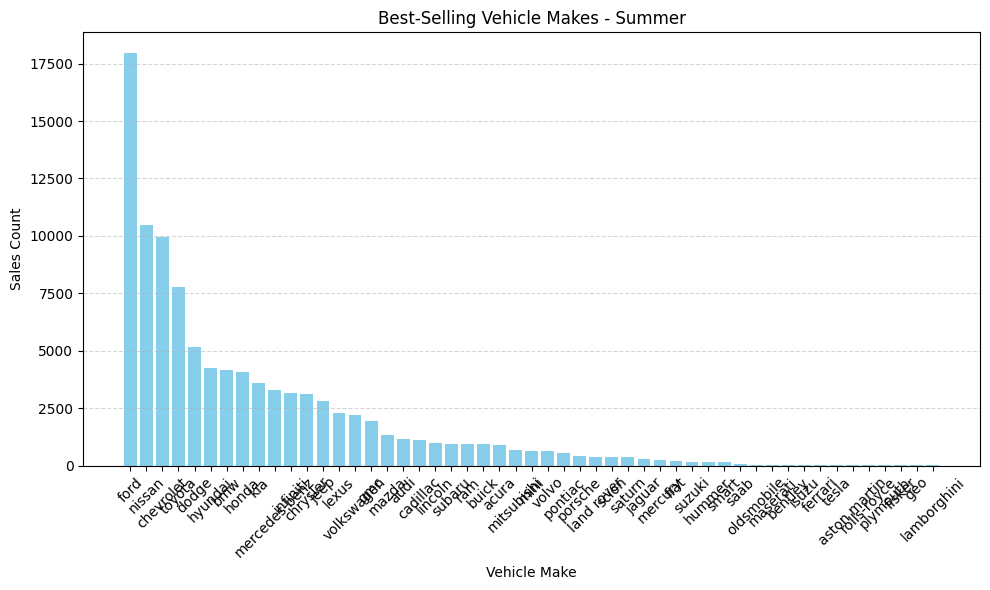

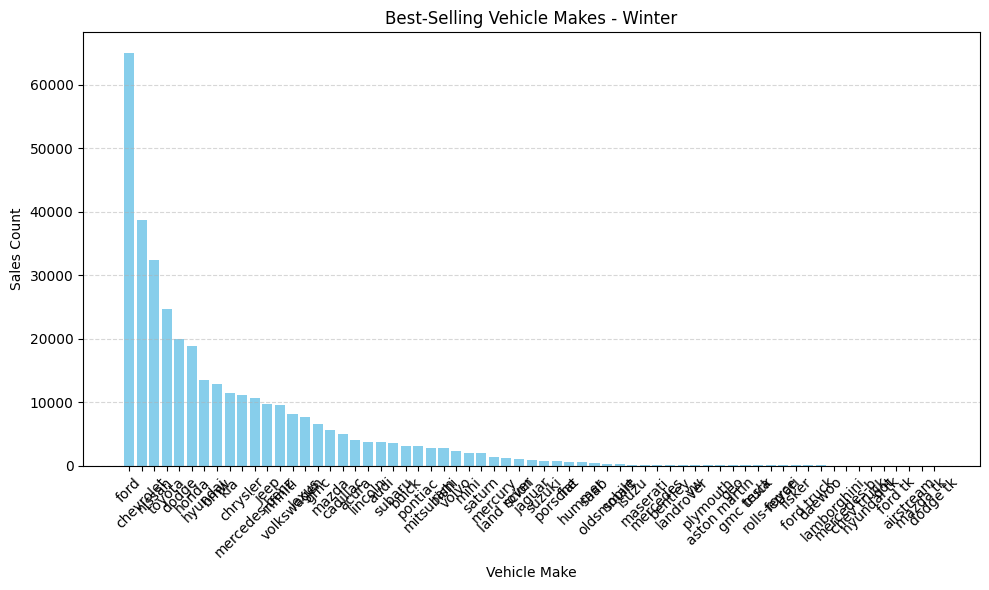

In [ ]:

# Best-Selling Vehicle Makes in Each Season
query = """
SELECT
  season,
  make,
  COUNT(*) AS sales_count
FROM (
  SELECT
    dv.make,
    CASE
      WHEN EXTRACT(MONTH FROM dd.saledate) IN (12, 1, 2) THEN 'Winter'
      WHEN EXTRACT(MONTH FROM dd.saledate) IN (3, 4, 5) THEN 'Summer'
      WHEN EXTRACT(MONTH FROM dd.saledate) IN (6, 7, 8) THEN 'Fall'
      WHEN EXTRACT(MONTH FROM dd.saledate) IN (9, 10, 11) THEN 'Spring'
    END AS season
  FROM
    zinc-wares-460713-v0.p2_vehicles_dataset.fact_vehicle_sales_table fv
  JOIN
    zinc-wares-460713-v0.p2_vehicles_dataset.dim_vehicles_table dv
  ON
    fv.vehicle_id = dv.vehicle_id
  JOIN
    zinc-wares-460713-v0.p2_vehicles_dataset.dim_date_table dd
  ON
    fv.date_id = dd.date_id
)
GROUP BY
  season, make
ORDER BY
  season, sales_count DESC;
"""

df = client.query(query).to_dataframe()

# Plotting
seasons = df['season'].unique()

for season in seasons:
    subset = df[df['season'] == season].sort_values('sales_count', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.bar(subset['make'], subset['sales_count'], color='skyblue')
    plt.title(f'Best-Selling Vehicle Makes - {season}')
    plt.xlabel('Vehicle Make')
    plt.ylabel('Sales Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()



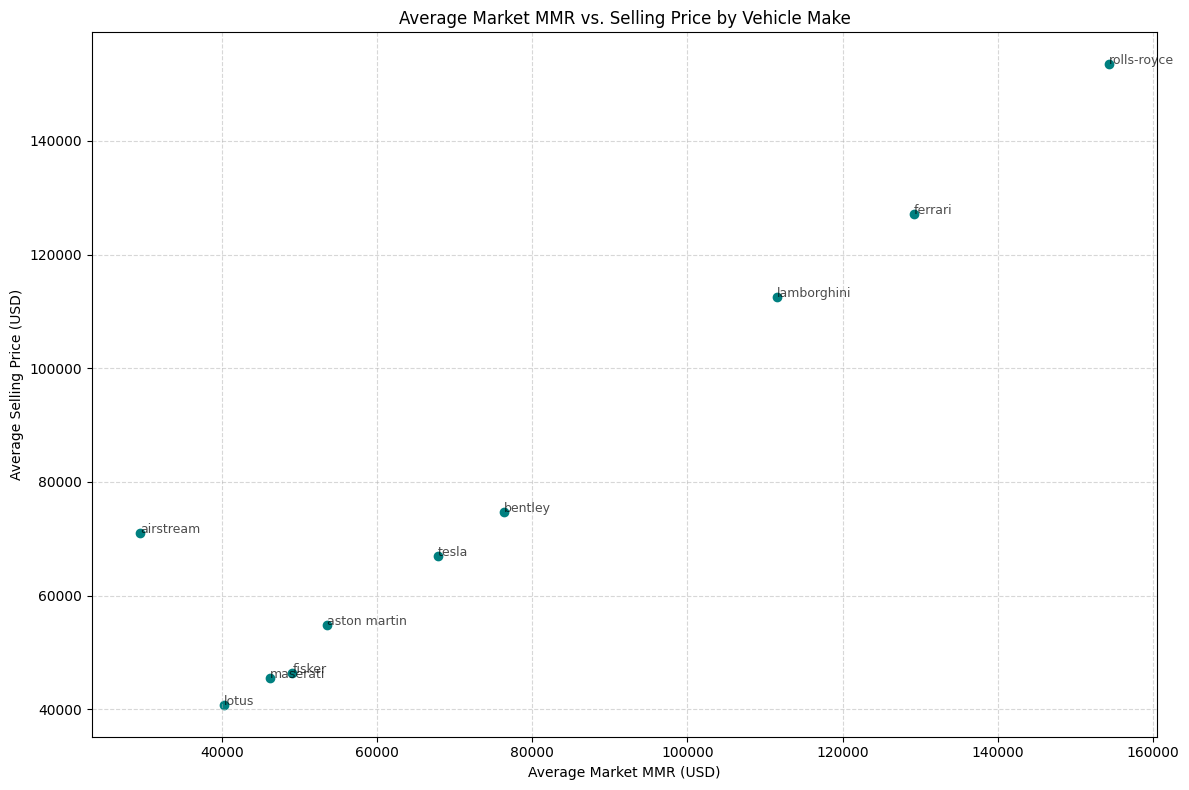

In [ ]:
#Average Market MMR vs Selling Price by Make

query = """
SELECT
  dv.make,
  ROUND(AVG(fv.mmr), 2) AS avg_mmr,
  ROUND(AVG(fv.sellingprice), 2) AS avg_selling_price
FROM
  `zinc-wares-460713-v0.p2_vehicles_dataset.fact_vehicle_sales_table` fv
JOIN
  `zinc-wares-460713-v0.p2_vehicles_dataset.dim_vehicles_table` dv
ON
  fv.vehicle_id = dv.vehicle_id
GROUP BY
  dv.make
ORDER BY
  avg_selling_price DESC LIMIT 10;
"""

df = client.query(query).to_dataframe()

plt.figure(figsize=(12, 8))
plt.scatter(df['avg_mmr'], df['avg_selling_price'], color='teal')

for i, make in enumerate(df['make']):
    plt.text(df['avg_mmr'][i], df['avg_selling_price'][i], make, fontsize=9, alpha=0.7)

plt.title('Average Market MMR vs. Selling Price by Vehicle Make')
plt.xlabel('Average Market MMR (USD)')
plt.ylabel('Average Selling Price (USD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


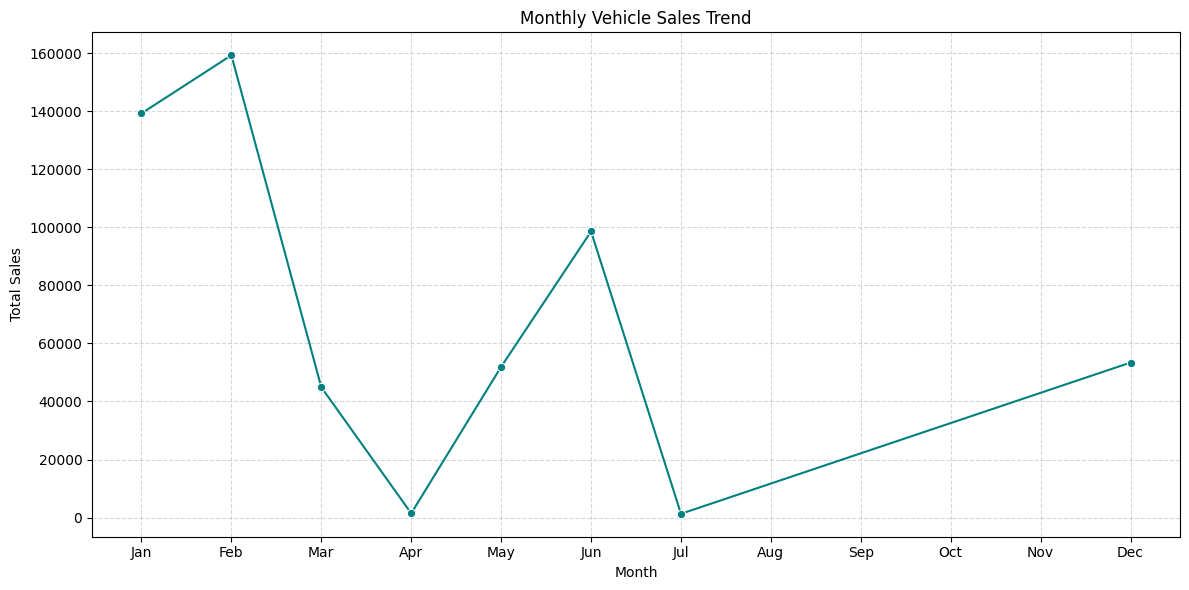

In [ ]:
#Monthly Vehicle Sales Trend

query = """
SELECT
  EXTRACT(MONTH FROM dd.saledate) AS month,
  COUNT(*) AS total_sales
FROM
  `zinc-wares-460713-v0.p2_vehicles_dataset.fact_vehicle_sales_table` fv
JOIN
  `zinc-wares-460713-v0.p2_vehicles_dataset.dim_date_table` dd
ON
  fv.date_id = dd.date_id
GROUP BY
  month
ORDER BY
  month;
"""

df = client.query(query).to_dataframe()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='month', y='total_sales', marker='o', color='teal')

plt.title('Monthly Vehicle Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(1,13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<ipython-input-31-e05e3e6e9e3f>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='transmission', y='transmission_count', palette='pastel')


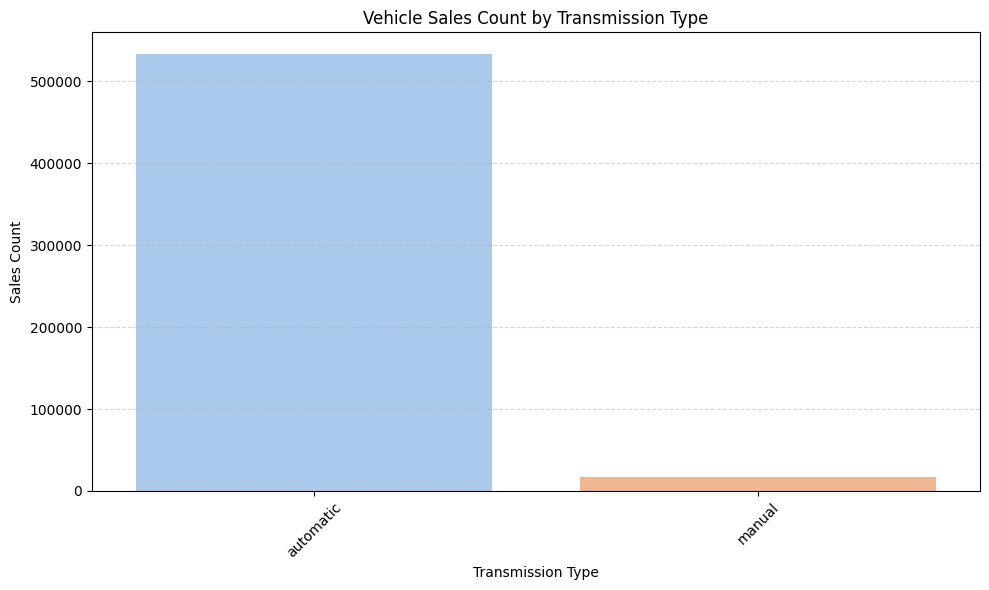

In [ ]:
#Most Frequently Used Transmission Types

query = """
SELECT
  dv.transmission,
  COUNT(*) AS transmission_count
FROM
  `zinc-wares-460713-v0.p2_vehicles_dataset.fact_vehicle_sales_table` fv
JOIN
  `zinc-wares-460713-v0.p2_vehicles_dataset.dim_vehicles_table` dv
ON
  fv.vehicle_id = dv.vehicle_id
GROUP BY
  dv.transmission
ORDER BY
  transmission_count DESC;
"""

df = client.query(query).to_dataframe()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='transmission', y='transmission_count', palette='pastel')

plt.title('Vehicle Sales Count by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Sales Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


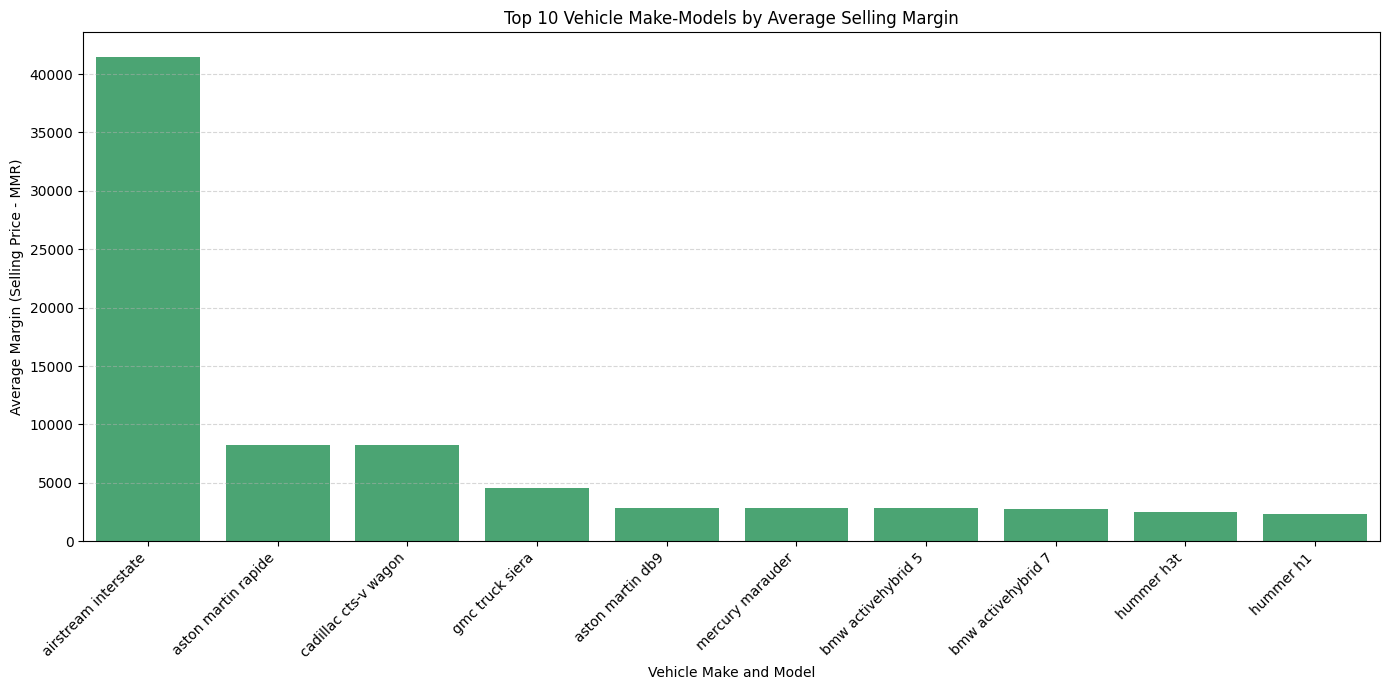

In [ ]:
#Profit Margin by Vehicle Make/Model

query = """
SELECT
  dv.make,
  dv.model,
  ROUND(AVG(fv.sellingprice - fv.mmr), 2) AS avg_margin
FROM
  `zinc-wares-460713-v0.p2_vehicles_dataset.fact_vehicle_sales_table` fv
JOIN
  `zinc-wares-460713-v0.p2_vehicles_dataset.dim_vehicles_table` dv
ON
  fv.vehicle_id = dv.vehicle_id
GROUP BY
  dv.make, dv.model
ORDER BY
  avg_margin DESC
LIMIT 10;
"""

df = client.query(query).to_dataframe()


df['make_model'] = df['make'] + ' ' + df['model']

plt.figure(figsize=(14, 7))
sns.barplot(data=df, x='make_model', y='avg_margin', color='mediumseagreen')

plt.title('Top 10 Vehicle Make-Models by Average Selling Margin')
plt.xlabel('Vehicle Make and Model')
plt.ylabel('Average Margin (Selling Price - MMR)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


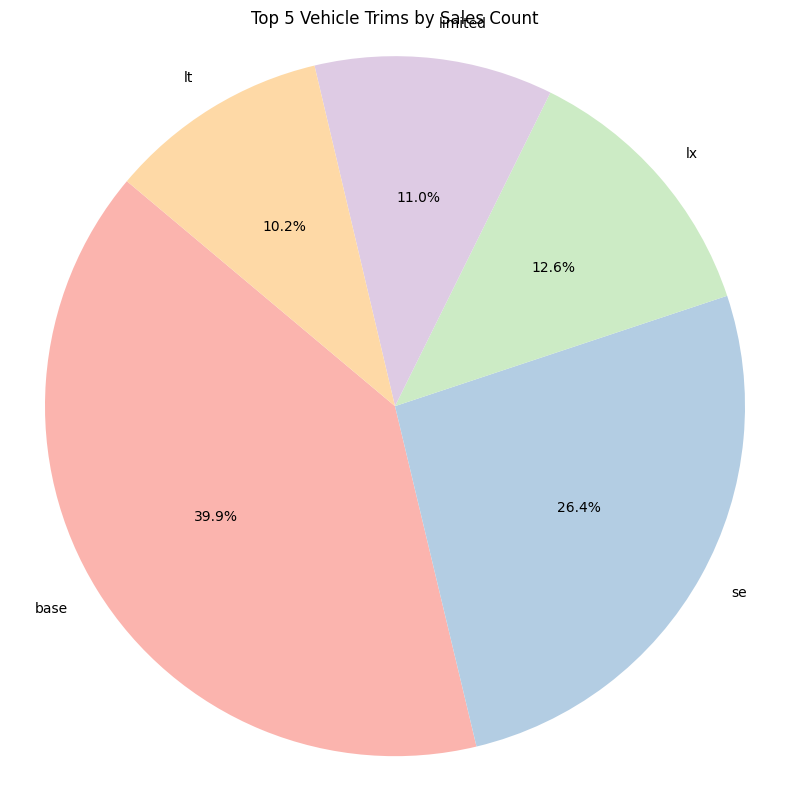

In [ ]:
#Top 5 vehicles trim by sales count

query = """
SELECT
  dv.trim,
  COUNT(*) AS trim_count
FROM
  `zinc-wares-460713-v0.p2_vehicles_dataset.fact_vehicle_sales_table` fv
JOIN
  `zinc-wares-460713-v0.p2_vehicles_dataset.dim_vehicles_table` dv
ON
  fv.vehicle_id = dv.vehicle_id
GROUP BY
  dv.trim
ORDER BY
  trim_count DESC
LIMIT 5;
"""

df = client.query(query).to_dataframe()

plt.figure(figsize=(8, 8))
plt.pie(df['trim_count'], labels=df['trim'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Top 5 Vehicle Trims by Sales Count')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular.
plt.tight_layout()
plt.show()


<ipython-input-36-07baa2512b69>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='trim', y='trim_count', palette='muted')


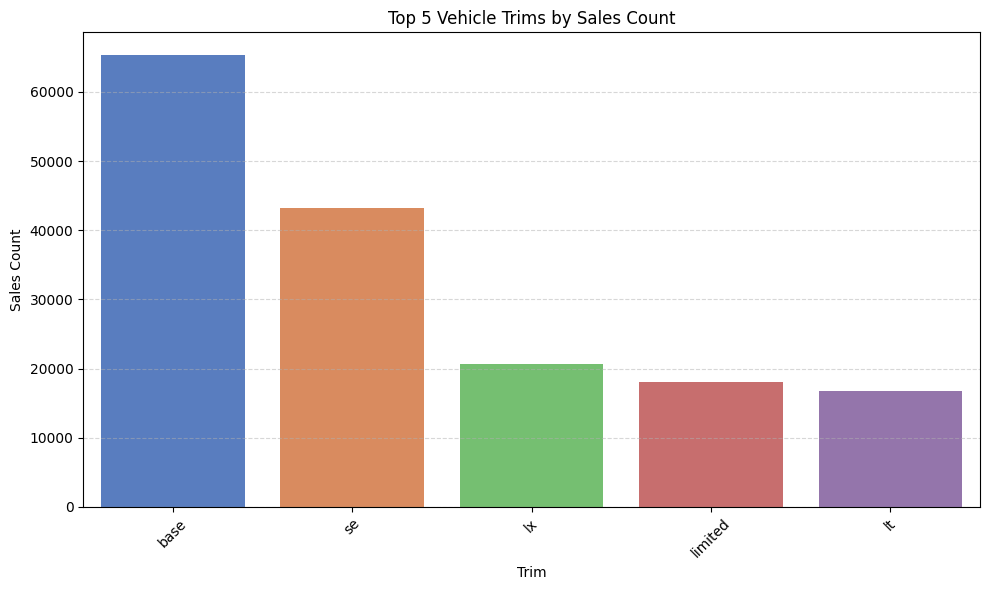

In [ ]:
#Top 5 Most Common Vehicle Trims Sold

query = """
SELECT
  dv.trim,
  COUNT(*) AS trim_count
FROM
  `zinc-wares-460713-v0.p2_vehicles_dataset.fact_vehicle_sales_table` fv
JOIN
  `zinc-wares-460713-v0.p2_vehicles_dataset.dim_vehicles_table` dv
ON
  fv.vehicle_id = dv.vehicle_id
GROUP BY
  dv.trim
ORDER BY
  trim_count DESC
LIMIT 5;
"""

df = client.query(query).to_dataframe()

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='trim', y='trim_count', palette='muted')

plt.title('Top 5 Vehicle Trims by Sales Count')
plt.xlabel('Trim')
plt.ylabel('Sales Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
